In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('Train.csv')

In [3]:
data_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


ID - Уникальный идентификатор

Gender - Пол клиента

Ever_Married - Женат/замужен

Age - Возраст клиента

Graduated - Окончено высшее образование

Profession - Профессия заказчика

Work_Experience - Опыт работы в годах

Spending_Score - Оценка расходов клиента

Family_Size - Количество членов семьи клиента (включая клиента)

Var_1 - Анонимизированная категория для клиента

Segmentation - (целевая переменная) Сегментация клиента

Задача классификации

In [4]:
# Удаляем уникальные значения id
data_train = data_train.drop(columns=["ID"]) 

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [6]:
# Заменяем NaN на моду
for col in data_train:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)

In [7]:
# Переводим значения в числовую шкалу
cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

le = LabelEncoder()
data_train[cols] = data_train[cols].apply(le.fit_transform)

In [8]:
# Разделяем набор данных на X - признаки, Y - целевая переменная
X = data_train.drop(['Segmentation'], axis=1)
Y = data_train.Segmentation

In [9]:
# Разделяем набор данных на тестовую и обучающую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

Построение модели классификации методом k ближайших соседей:

In [10]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
Y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.43      0.38       568
           1       0.30      0.31      0.30       538
           2       0.52      0.46      0.49       610
           3       0.64      0.55      0.59       705

    accuracy                           0.45      2421
   macro avg       0.45      0.44      0.44      2421
weighted avg       0.46      0.45      0.45      2421



Text(0.5, 15.0, 'Предсказанные значения')

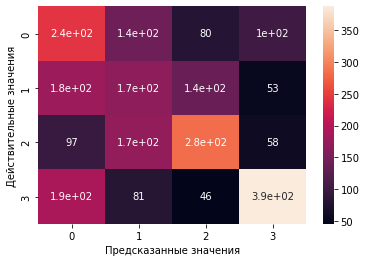

In [12]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оптимизация гиперпараметров с помощью Grid Search:

In [13]:
param_grid = {"n_neighbors": range(1, 30, 1), 
              "weights": ['uniform', 'distance'], 
              "p": [1, 2]}

In [14]:
%%time
model_knn = KNeighborsClassifier()
model_knn_opt = GridSearchCV(estimator = model_knn, param_grid = param_grid, cv = 4, verbose= 1, n_jobs = -1)

model_knn_opt.fit(X_train,Y_train)

Fitting 4 folds for each of 116 candidates, totalling 464 fits
CPU times: user 239 ms, sys: 119 ms, total: 358 ms
Wall time: 3.11 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [15]:
model_knn_opt.best_params_

{'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}

In [16]:
Y_pred = model_knn_opt.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.47      0.43       568
           1       0.36      0.31      0.34       538
           2       0.58      0.56      0.57       610
           3       0.64      0.63      0.63       705

    accuracy                           0.50      2421
   macro avg       0.49      0.49      0.49      2421
weighted avg       0.51      0.50      0.50      2421

